<a href="https://colab.research.google.com/github/ashwinibhatM19/Samsung/blob/main/NB_cars_mushrooms_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset link http://archive.ics.uci.edu/ml/datasets/Car+Evaluation

http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data

http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.names

In [1]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split


In [17]:
!wget -nc https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data


--2025-08-19 09:22:04--  https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘agaricus-lepiota.data’

agaricus-lepiota.da     [  <=>               ] 364.95K  1.52MB/s    in 0.2s    

2025-08-19 09:22:04 (1.52 MB/s) - ‘agaricus-lepiota.data’ saved [373704]



In [18]:
print(mush_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [49]:
mush_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [50]:
mush_features = mush_df.drop(['class'], axis=1)


In [51]:
mush_features.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [53]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(mush_features)
mush_encoded = pd.DataFrame(data_encoded)

In [22]:
target_encoder = LabelEncoder()
target_encoded = target_encoder.fit_transform(mush_target)

In [23]:
mush_encoded['class'] = target_encoded
print(mush_encoded.head())

     0    1    2    3    4    5    6    7    8    9  ...   13   14   15   16  \
0  5.0  2.0  4.0  1.0  6.0  1.0  0.0  1.0  4.0  0.0  ...  7.0  7.0  0.0  2.0   
1  5.0  2.0  9.0  1.0  0.0  1.0  0.0  0.0  4.0  0.0  ...  7.0  7.0  0.0  2.0   
2  0.0  2.0  8.0  1.0  3.0  1.0  0.0  0.0  5.0  0.0  ...  7.0  7.0  0.0  2.0   
3  5.0  3.0  8.0  1.0  6.0  1.0  0.0  1.0  5.0  0.0  ...  7.0  7.0  0.0  2.0   
4  5.0  2.0  3.0  0.0  5.0  1.0  1.0  0.0  4.0  1.0  ...  7.0  7.0  0.0  2.0   

    17   18   19   20   21  class  
0  1.0  4.0  2.0  3.0  5.0      1  
1  1.0  4.0  3.0  2.0  1.0      0  
2  1.0  4.0  3.0  2.0  3.0      0  
3  1.0  4.0  2.0  3.0  5.0      1  
4  1.0  0.0  3.0  0.0  1.0      0  

[5 rows x 23 columns]


In [54]:
mush_df_encoded = pd.DataFrame(data_encoded)
mush_df_encoded.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
1,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,1.0
2,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,3.0
3,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
4,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,1.0,...,2.0,7.0,7.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0


In [58]:
encoder = LabelEncoder()
target_encoded = encoder.fit_transform(mush_df['class'])
mush_df_encoded['class'] = target_encoded
mush_df_encoded['class']

,class
0,1
1,0
2,0
3,1
4,0
...,...
8119,0
8120,0
8121,0
8122,1


In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    mush_df_encoded.drop('class', axis=1),
    mush_df_encoded['class'],
    test_size=0.3,
    random_state=143
)

In [61]:
cnb = CategoricalNB()
cnb.fit(X_train, y_train)

CategoricalNB()

In [62]:
y_pred_cnb = cnb.predict(X_test)
y_prob_pred_cnb = cnb.predict_proba(X_test)

In [63]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the target variable for each class
y_test_binarized = label_binarize(y_test, classes=cnb.classes_)

# Compute ROC AUC for each class
roc_auc_scores = []
for i in range(y_test_binarized.shape[1]):
    score = roc_auc_score(y_test_binarized[:, i], y_prob_pred_cnb[:, i])
    roc_auc_scores.append(score)

# Print individual ROC AUC scores for each class
for i, score in enumerate(roc_auc_scores):
    print(f"ROC AUC for class {i}: {score}")

ROC AUC for class 0: 0.002476094276094276


In [64]:
fpr = {}
tpr = {}
thresh = {}

n_class = len(np.unique(y_train))  # should be 2 for mushrooms


In [65]:
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_cnb[:, i], pos_label=i)


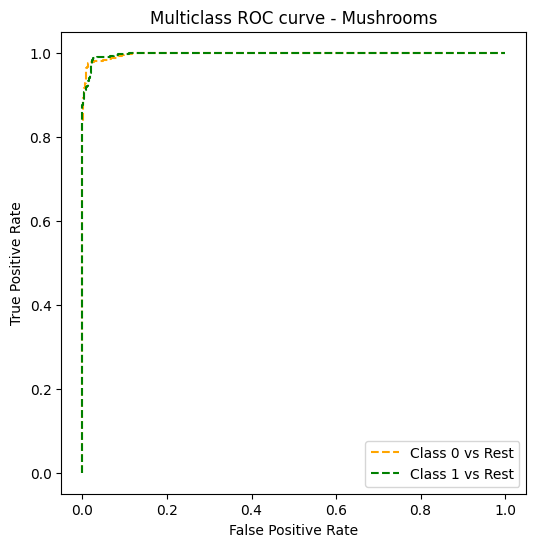

In [66]:
plt.figure(figsize=(6, 6))
colors = ['orange', 'green']
for i in range(n_class):
    plt.plot(fpr[i], tpr[i], linestyle='--', color=colors[i], label=f'Class {i} vs Rest')

plt.title('Multiclass ROC curve - Mushrooms')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('Mushroom_ROC.png', dpi=300)
plt.show()

In [34]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [35]:
! wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data

File ‘car.data’ already there; not retrieving.



In [36]:

#loading the dataset
car_df = pd.read_csv("/content/car.data",
                     names=['buying','maint','doors','persons','lug_boot','safety','class'], sep=",")

In [37]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [38]:
car_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [39]:
car_df_features = car_df.drop(['class'],axis=1)

In [40]:
car_df_features.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [41]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

#encoding categorical fetures and target variable
encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(car_df_features)
data_encoded

array([[3., 3., 0., 0., 2., 1.],
       [3., 3., 0., 0., 2., 2.],
       [3., 3., 0., 0., 2., 0.],
       ...,
       [1., 1., 3., 2., 0., 1.],
       [1., 1., 3., 2., 0., 2.],
       [1., 1., 3., 2., 0., 0.]])

In [42]:
car_df_encoded = pd.DataFrame(data_encoded)
car_df_encoded.head()

,0,1,2,3,4,5
0,3.0,3.0,0.0,0.0,2.0,1.0
1,3.0,3.0,0.0,0.0,2.0,2.0
2,3.0,3.0,0.0,0.0,2.0,0.0
3,3.0,3.0,0.0,0.0,1.0,1.0
4,3.0,3.0,0.0,0.0,1.0,2.0


In [43]:
encoder = LabelEncoder()
target_encoded = encoder.fit_transform(car_df['class'])
car_df_encoded['class'] = target_encoded
car_df_encoded['class']

,class
0,2
1,2
2,2
3,2
4,2
...,...
1723,1
1724,3
1725,2
1726,1


In [44]:
#train and test split
X_train, X_test, y_train, y_test = train_test_split(car_df_encoded.drop('class', axis=1), car_df_encoded['class'], test_size=0.3, random_state=143)

In [45]:
#train the model
cnb = CategoricalNB()
cnb.fit(X_train, y_train)

CategoricalNB()

In [46]:

#predicting the data
y_pred_cnb = cnb.predict(X_test)
y_prob_pred_cnb = cnb.predict_proba(X_test)

In [47]:
#roc auc score
roc_auc_score(y_test, y_prob_pred_cnb, multi_class='ovo', average='weighted')

np.float64(0.9666097361759127)

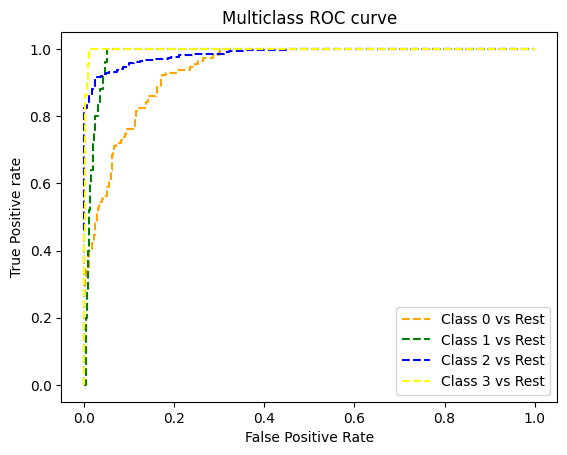

In [48]:
import matplotlib.pyplot as plt

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_cnb[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [67]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [68]:
!wget -nc https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data


--2025-08-19 09:40:05--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘wine.data’

wine.data               [ <=>                ]  10.53K  --.-KB/s    in 0s      

2025-08-19 09:40:06 (129 MB/s) - ‘wine.data’ saved [10782]



In [69]:
columns = [
    'class', 'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_of_Ash', 'Magnesium',
    'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins',
    'Color_Intensity', 'Hue', 'OD280/OD315', 'Proline'
]

In [70]:
wine_df = pd.read_csv("wine.data", names=columns)

In [71]:
print(wine_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity_of_Ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_Phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_Phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_Intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280/OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


In [73]:
wine_df.head()

,class,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [74]:
wine_features = wine_df.drop(['class'], axis=1)
wine_target = wine_df['class']

In [75]:
scaler = StandardScaler()
wine_features_scaled = scaler.fit_transform(wine_features)


In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    wine_features_scaled, wine_target, test_size=0.3, random_state=143
)

In [77]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)


GaussianNB()

In [79]:
y_pred = gnb.predict(X_test)
y_prob_pred = gnb.predict_proba(X_test)


In [80]:
print("ROC AUC Score:",
      roc_auc_score(y_test, y_prob_pred, multi_class='ovo', average='weighted'))

ROC AUC Score: 1.0


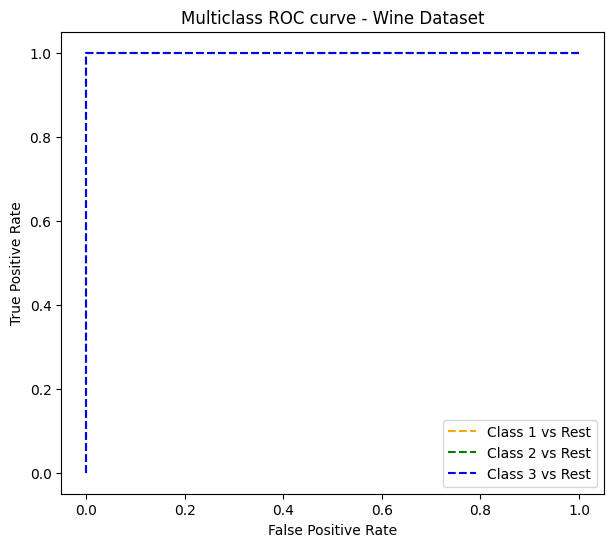

In [81]:
fpr = {}
tpr = {}
thresh = {}
n_class = len(np.unique(y_train))

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred[:, i], pos_label=i+1)

plt.figure(figsize=(7, 6))
colors = ['orange', 'green', 'blue']
for i in range(n_class):
    plt.plot(fpr[i], tpr[i], linestyle='--', color=colors[i], label=f'Class {i+1} vs Rest')

plt.title('Multiclass ROC curve - Wine Dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('Wine_ROC.png', dpi=300)
plt.show()